In [1]:
# Required imports

import pandas as pd

In [2]:
# Reading the data
        # Organising by the earth date
        # dropping unnecessary columns
        # reseting the sorted indexes
        # Ignoring the 1st row for isolated date
        
df = pd.read_csv('/Users/akash/Desktop/Terraforming Mars Project/Reference Datasets/mars-weather.csv') \
        .sort_values(by='terrestrial_date') \
        .drop(['id', 'wind_speed', 'atmo_opacity', 'sol', 'month'], axis = 1) \
        .reset_index() \
        .iloc[1:,2:]

In [3]:
df.head()

,ls,min_temp,max_temp,pressure
1,155,NaN,NaN,NaN
2,155,-75.0,-16.0,739.0
3,156,-76.0,-11.0,740.0
4,156,-76.0,-18.0,741.0
5,157,-74.0,-15.0,732.0


In [4]:
# Assuming the martian weather does stay constant which is indicated, repeating the data for 1 million days

# Sol is 1 martian day
# 1 martian year is 668 sols -> Data is at sol level originally

rounded_num_of_mars_years_in_df = int(df.shape[0] / 668)
print('There are {} martian years + {} sols worth of data in the dataset.'.format(rounded_num_of_mars_years_in_df, df.shape[0] - rounded_num_of_mars_years_in_df * 688))
print('Rounding the data to {} years = {} sols.\n'.format(rounded_num_of_mars_years_in_df, rounded_num_of_mars_years_in_df * 668))
df_trunc_size = rounded_num_of_mars_years_in_df * 668
df = df.iloc[ : df_trunc_size-1 , :]

# Extrapolating the data for the next 750 martian years to achieve project criteria, + 1 is a buffer

repetation_factor = int(1000000 / df.shape[0]) + 1 
print('Repeating the data for {} times will achieve project ruberick point of 1 million rows.'.format(repetation_factor))

There are 2 martian years + 517 sols worth of data in the dataset.
Rounding the data to 2 years = 1336 sols.

Repeating the data for 750 times will achieve project ruberick point of 1 million rows.


In [5]:
# Repeating the dataframe 

repeated_df = pd.concat([df]*repetation_factor).reset_index().iloc[ : , 1 : ]
print('# of rows in new synthesized df = {}.'.format(repeated_df.shape[0]))
assert(repeated_df.shape[0]>1000000)

# of rows in new synthesized df = 1001250.


In [6]:
repeated_df['avg_temp'] = (repeated_df['min_temp'] + repeated_df['max_temp']) / 2

In [7]:
repeated_df.head()

,ls,min_temp,max_temp,pressure,avg_temp
0,155,NaN,NaN,NaN,NaN
1,155,-75.0,-16.0,739.0,-45.5
2,156,-76.0,-11.0,740.0,-43.5
3,156,-76.0,-18.0,741.0,-47.0
4,157,-74.0,-15.0,732.0,-44.5


In [8]:
# Since the data is cyclic and variation is little, treating missing values with column averages

repeated_df = repeated_df.apply(lambda x: x.fillna(x.mean()), axis = 0)
repeated_df['Sol'] = pd.to_numeric(repeated_df.index + 1)
repeated_df.head()

,ls,min_temp,max_temp,pressure,avg_temp,Sol
0,155,-76.389482,-12.134146,838.522866,-44.261814,1
1,155,-75.000000,-16.000000,739.000000,-45.500000,2
2,156,-76.000000,-11.000000,740.000000,-43.500000,3
3,156,-76.000000,-18.000000,741.000000,-47.000000,4
4,157,-74.000000,-15.000000,732.000000,-44.500000,5


In [9]:
import matplotlib.pyplot as plt

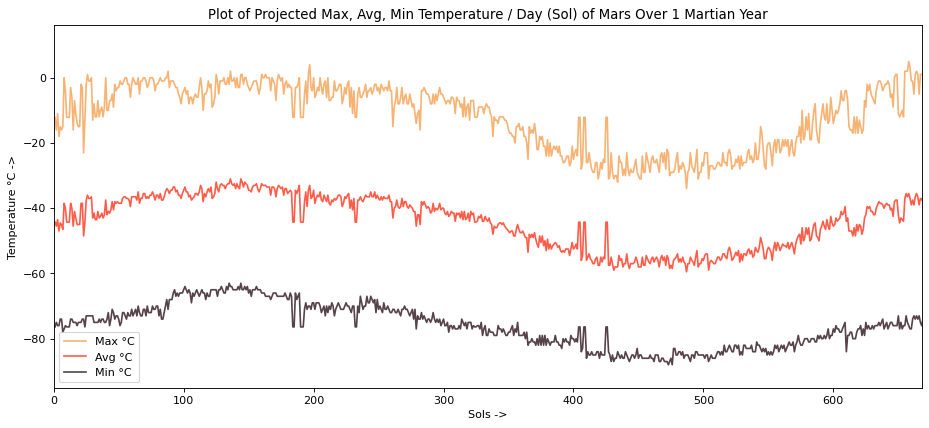

In [43]:
plt.figure(figsize=(14, 6), dpi=80)
plt.title('Plot of Projected Max, Avg, Min Temperature / Day (Sol) of Mars Over 1 Martian Year')

line2 = plt.plot(repeated_df.Sol, repeated_df['max_temp'], '#f7b374', label='Max °C')
line3 = plt.plot(repeated_df.Sol, repeated_df['avg_temp'], '#ff5d4a', label='Avg °C')
line1 = plt.plot(repeated_df.Sol, repeated_df['min_temp'], '#564349', label='Min °C')

plt.xlim(0,668)
plt.xlabel('Sols ->')
plt.ylabel('Temperature °C ->')
plt.legend()
plt.show()

<ipython-input-47-1eb7ff90dd98>:10: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f99282b7370>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([line1, line2, line3], ['Minimum Temperature', 'Maximum Temperature', 'Average Temperature'])
<ipython-input-47-1eb7ff90dd98>:10: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f99aa5793d0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([line1, line2, line3], ['Minimum Temperature', 'Maximum Temperature', 'Average Temperature'])
<ipython-input-47-1eb7ff90dd98>:10: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f99282b77c0>] instances.
A proxy artist may be used instead.
See: https://matp

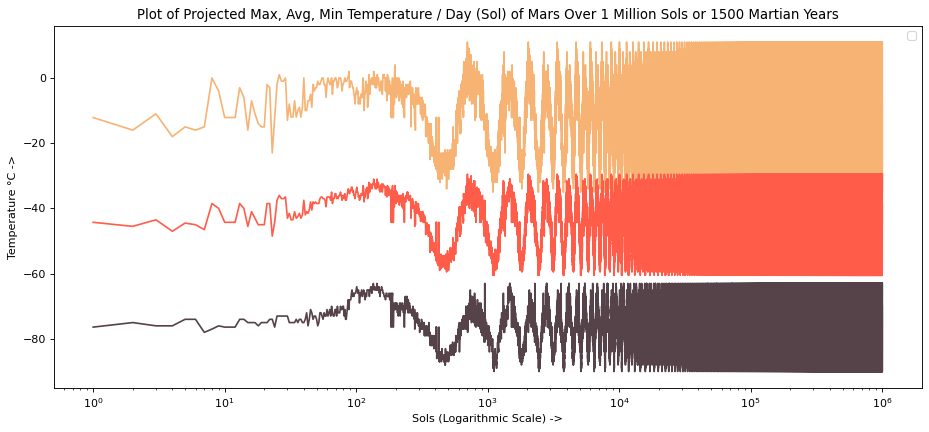

In [47]:
plt.figure(figsize=(14, 6), dpi=80)
plt.title('Plot of Projected Max, Avg, Min Temperature / Day (Sol) of Mars Over 1 Million Sols or 1500 Martian Years')

line1 = plt.plot(repeated_df.Sol, repeated_df['min_temp'], '#564349')
line2 = plt.plot(repeated_df.Sol, repeated_df['max_temp'], '#f7b374')
line3 = plt.plot(repeated_df.Sol, repeated_df['avg_temp'], '#ff5d4a')

plt.xlabel('Sols (Logarithmic Scale) ->')
plt.ylabel('Temperature °C ->')
plt.legend([line1, line2, line3], ['Minimum Temperature', 'Maximum Temperature', 'Average Temperature'])
plt.xscale('log')
plt.show()

In [48]:
print(':: Creating a linear temperature data transformer ::\n')
print('Sol 1 average temp              ->  {} °C'.format(round(repeated_df.iloc[0,4], 2)))
print("Sol 1M required average temp    ->  +28.00 °C ~ Earth's room temp\n")

print('X axis :        1 -> 1000000  sols')
print('Y axis :   -44.26 -> 28.00    °C')
print('\nTherefore, \n')
print('(x1, y1) = (1, -44.26)')
print('(x2, y2) = (1000000, 28.00)')
print('\nTherefore, fitting into the y = mx + c form gives us:\n')

# Calculating the transformer equation
x1, y1, x2, y2 = 1, -44.26, 1000000, 28.00
slope = (y2 - y1) / (x2 - x1)
print('y = {} * (x - 1000000) + 28.00'.format(round(slope, 5)))

# Function to be used on data -> Sol I/P ->::-> Avg. Temp O/P.
def linear_transformer_temperature(x):
    y = slope * (x - 1000000) + 28.00
    return y

:: Creating a linear temperature data transformer ::

Sol 1 average temp              ->  -44.26 °C
Sol 1M required average temp    ->  +28.00 °C ~ Earth's room temp

X axis :        1 -> 1000000  sols
Y axis :   -44.26 -> 28.00    °C

Therefore, 

(x1, y1) = (1, -44.26)
(x2, y2) = (1000000, 28.00)

Therefore, fitting into the y = mx + c form gives us:

y = 7e-05 * (x - 1000000) + 28.00


In [49]:
# Using index + 1 as SOL day
repeated_df['transformer'] = repeated_df.apply(lambda row: linear_transformer_temperature(row['Sol']), axis = 1)
current_average = repeated_df['avg_temp'].mean()

# Transforming the average cyclic data
repeated_df['transformed_avg_temp'] = repeated_df.apply(lambda row: (row['transformer'] - (current_average - row['avg_temp'])), axis = 1)
repeated_df['transformed_min_temp'] = repeated_df.apply(lambda row: (row['transformed_avg_temp'] - abs(row['min_temp'] - row['avg_temp'])), axis = 1)
repeated_df['transformed_max_temp'] = repeated_df.apply(lambda row: (row['transformed_avg_temp'] + abs(row['max_temp'] - row['avg_temp'])), axis = 1)

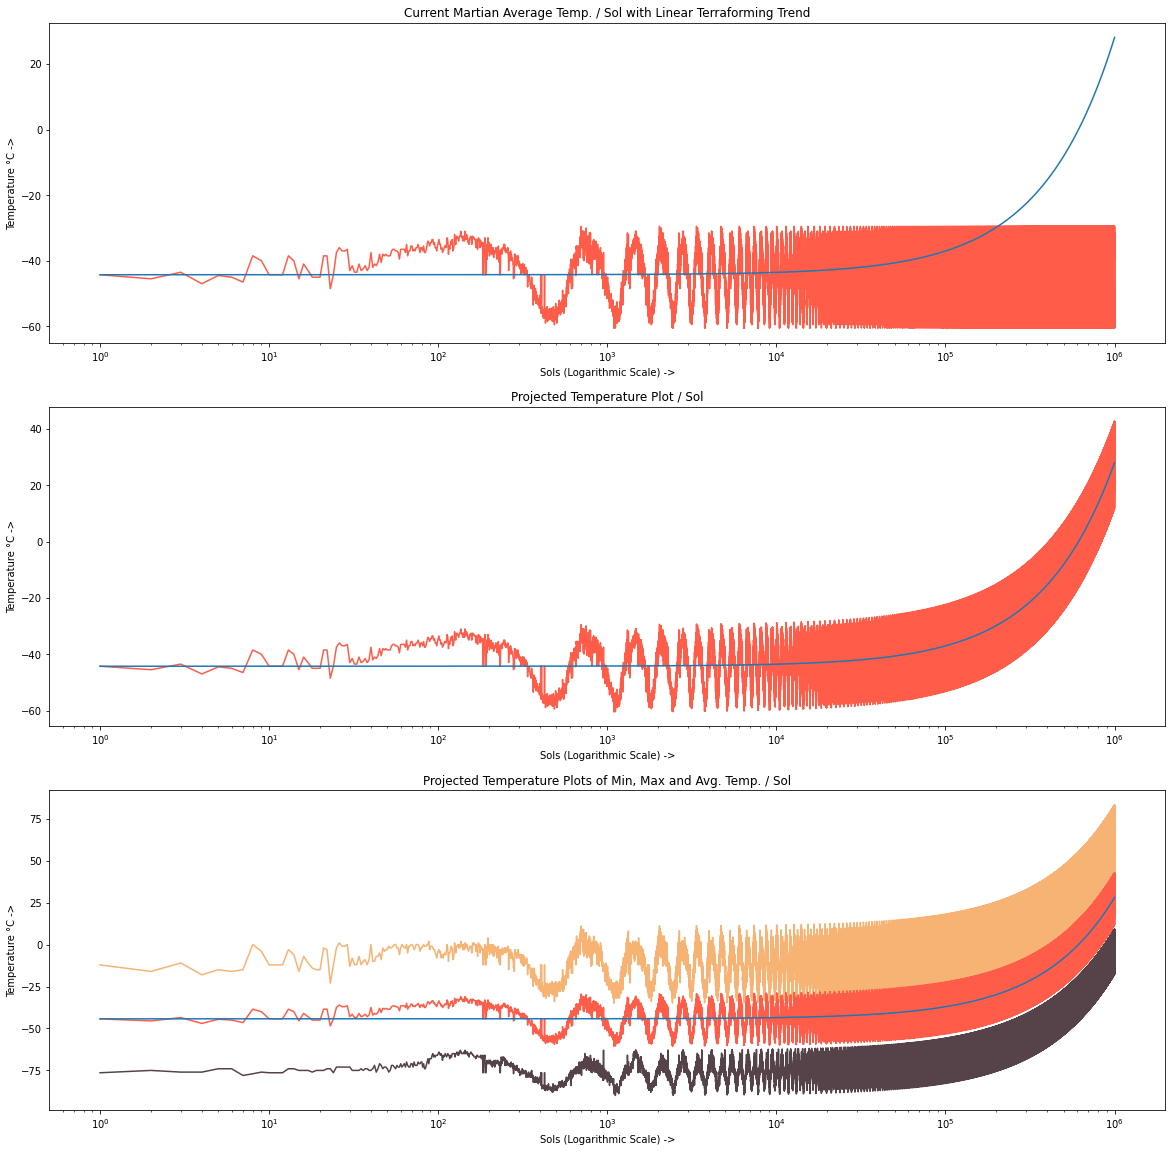

In [53]:
figure, axis = plt.subplots(3, 1, figsize=(20,20))

axis[0].set_title('Current Martian Average Temp. / Sol with Linear Terraforming Trend')
axis[0].plot(repeated_df.Sol, repeated_df['avg_temp'], '#ff5d4a')
axis[0].plot(repeated_df.Sol, repeated_df['transformer'])

axis[0].set_xlabel('Sols (Logarithmic Scale) ->')
axis[0].set_ylabel('Temperature °C ->')
axis[0].set_xscale('log')

axis[1].set_title('Projected Temperature Plot / Sol')
axis[1].plot(repeated_df.Sol, repeated_df['transformed_avg_temp'], '#ff5d4a')
axis[1].plot(repeated_df.Sol, repeated_df['transformer'])

axis[1].set_xlabel('Sols (Logarithmic Scale) ->')
axis[1].set_ylabel('Temperature °C ->')
axis[1].set_xscale('log')

axis[2].set_title('Projected Temperature Plots of Min, Max and Avg. Temp. / Sol')
axis[2].plot(repeated_df.Sol, repeated_df['transformed_min_temp'], '#564349', markersize=0.2)
axis[2].plot(repeated_df.Sol, repeated_df['transformed_max_temp'], '#f7b374', markersize=0.2)
axis[2].plot(repeated_df.Sol, repeated_df['transformed_avg_temp'], '#ff5d4a', markersize=0.2)
axis[2].plot(repeated_df.Sol, repeated_df['transformer'])

axis[2].set_xlabel('Sols (Logarithmic Scale) ->')
axis[2].set_ylabel('Temperature °C ->')
axis[2].set_xscale('log')

In [54]:
# If Mars grows an atmosphere, the average difference between min and max temp with the average must come down.
# The nights cannot be too cold. 
# The days cannot be too hot.
# Therefore secondary transformers are required to reduce the variation.

# Transforming the average cyclic data
repeated_df['transformed_min_temp_dampened'] = repeated_df.apply(lambda row: (row['transformed_avg_temp'] - (1-(row['Sol'] / 1005000)) * (abs(row['min_temp'] - row['avg_temp']))), axis = 1)
repeated_df['transformed_max_temp_dampened'] = repeated_df.apply(lambda row: (row['transformed_avg_temp'] + (1-(row['Sol'] / 1005000)) * (abs(row['max_temp'] - row['avg_temp']))), axis = 1)

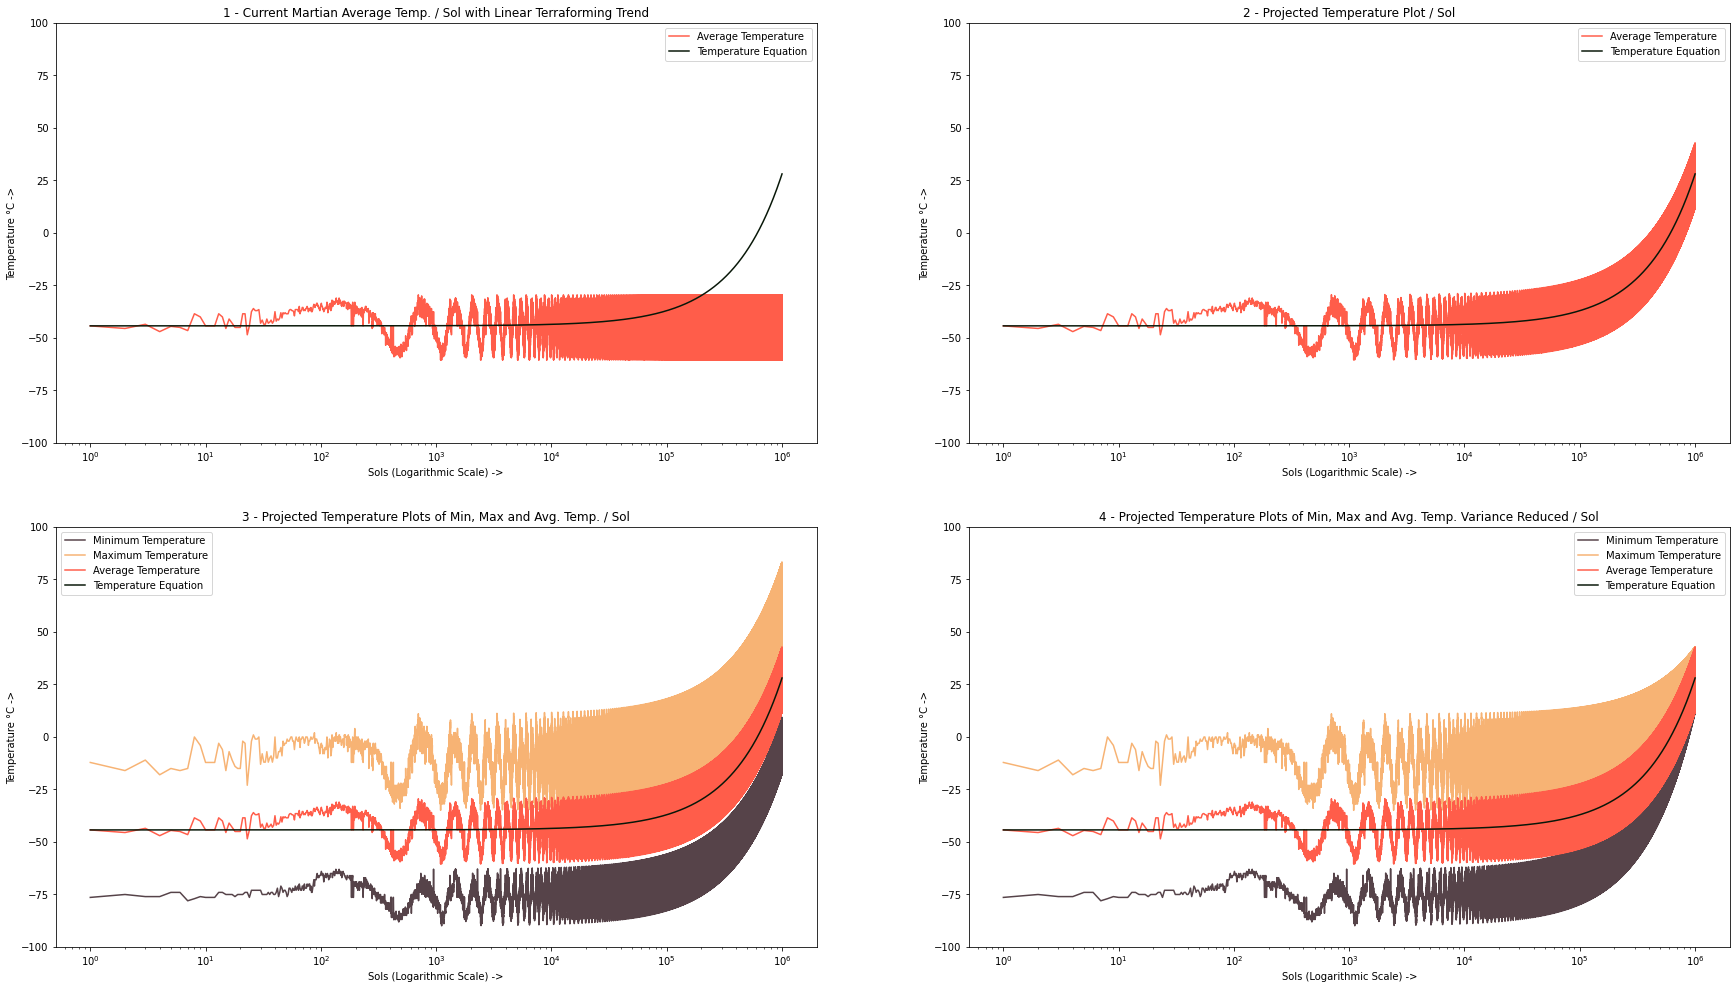

In [76]:
figure, axis = plt.subplots(2, 2, figsize=(30,17))

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 1000000)
custom_ylim = (-100, 100)

# Setting the values for all axes.
plt.setp(axis, ylim=custom_ylim)

axis[0][0].set_title('1 - Current Martian Average Temp. / Sol with Linear Terraforming Trend')
axis[0][0].plot(repeated_df.Sol, repeated_df['avg_temp'], '#ff5d4a', label='Average Temperature')
axis[0][0].plot(repeated_df.Sol, repeated_df['transformer'], '#081708', label='Temperature Equation')

axis[0][0].set_xlabel('Sols (Logarithmic Scale) ->')
axis[0][0].set_ylabel('Temperature °C ->')
axis[0][0].set_xscale('log')
axis[0][0].legend()

axis[0][1].set_title('2 - Projected Temperature Plot / Sol')
axis[0][1].plot(repeated_df.Sol, repeated_df['transformed_avg_temp'], '#ff5d4a', label='Average Temperature')
axis[0][1].plot(repeated_df.Sol, repeated_df['transformer'],'#081708', label='Temperature Equation')

axis[0][1].set_xlabel('Sols (Logarithmic Scale) ->')
axis[0][1].set_ylabel('Temperature °C ->')
axis[0][1].set_xscale('log')
axis[0][1].legend()

axis[1][0].set_title('3 - Projected Temperature Plots of Min, Max and Avg. Temp. / Sol')
axis[1][0].plot(repeated_df.Sol, repeated_df['transformed_min_temp'], '#564349', markersize=0.2, label='Minimum Temperature')
axis[1][0].plot(repeated_df.Sol, repeated_df['transformed_max_temp'], '#f7b374', markersize=0.2, label='Maximum Temperature')
axis[1][0].plot(repeated_df.Sol, repeated_df['transformed_avg_temp'], '#ff5d4a', markersize=0.2, label='Average Temperature')
axis[1][0].plot(repeated_df.Sol, repeated_df['transformer'],'#081708', label='Temperature Equation')

axis[1][0].set_xlabel('Sols (Logarithmic Scale) ->')
axis[1][0].set_ylabel('Temperature °C ->')
axis[1][0].set_xscale('log')
axis[1][0].legend()

axis[1][1].set_title('4 - Projected Temperature Plots of Min, Max and Avg. Temp. Variance Reduced / Sol')
axis[1][1].plot(repeated_df.Sol, repeated_df['transformed_min_temp_dampened'], '#564349', markersize = 0.2, label='Minimum Temperature')
axis[1][1].plot(repeated_df.Sol, repeated_df['transformed_max_temp_dampened'], '#f7b374', markersize = 0.2, label='Maximum Temperature')
axis[1][1].plot(repeated_df.Sol, repeated_df['transformed_avg_temp'], '#ff5d4a', markersize = 0.2, label='Average Temperature')
axis[1][1].plot(repeated_df.Sol, repeated_df['transformer'], '#081708', markersize = 0.2, label='Temperature Equation')

axis[1][1].set_xlabel('Sols (Logarithmic Scale) ->')
axis[1][1].set_ylabel('Temperature °C ->')
axis[1][1].set_xscale('log')
axis[1][1].legend()

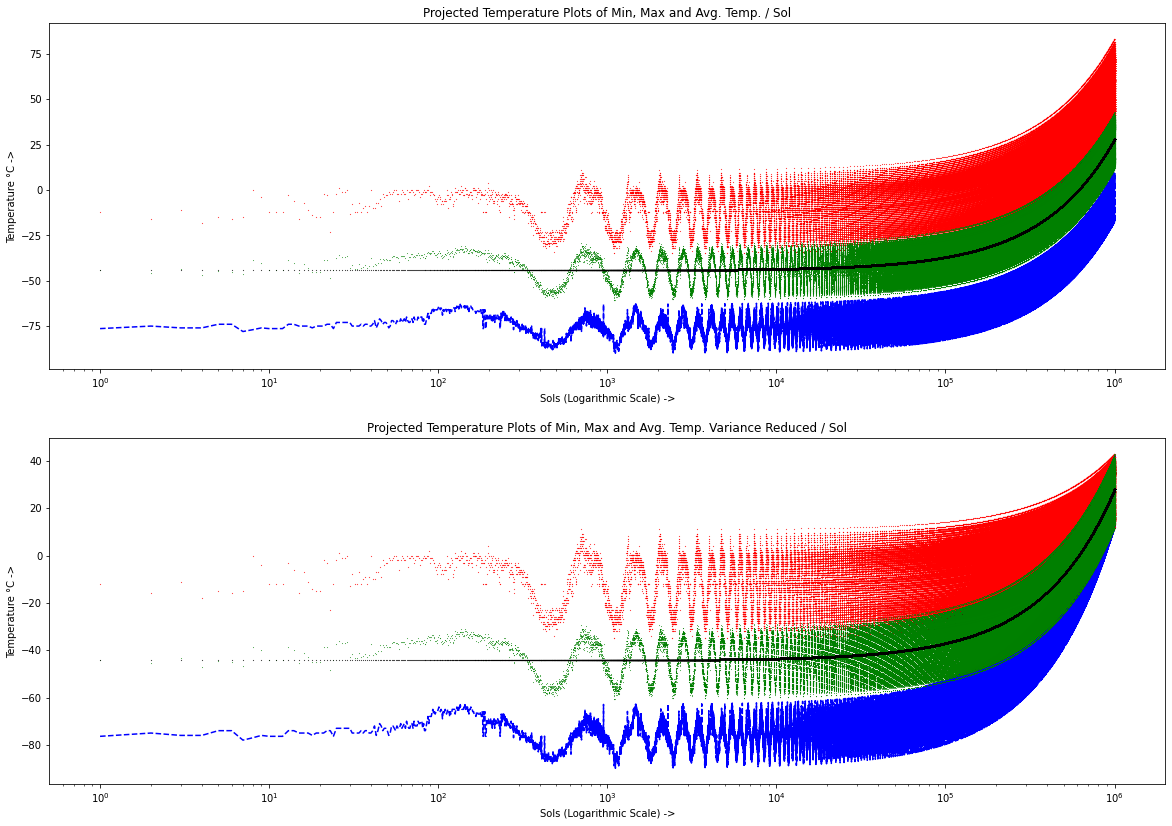

In [77]:
figure, axis = plt.subplots(2, 1, figsize=(20,14))

axis[0].set_title('Projected Temperature Plots of Min, Max and Avg. Temp. / Sol')
axis[0].plot(repeated_df.Sol, repeated_df['transformed_min_temp'], 'b--', \
         repeated_df.Sol, repeated_df['transformed_max_temp'], 'rs', \
         repeated_df.Sol, repeated_df['transformed_avg_temp'], 'g^', \
         repeated_df.Sol, repeated_df['transformer'], 'ks', \
         markersize = 0.2)

axis[0].set_xlabel('Sols (Logarithmic Scale) ->')
axis[0].set_ylabel('Temperature °C ->')
axis[0].set_xscale('log')


axis[1].set_title('Projected Temperature Plots of Min, Max and Avg. Temp. Variance Reduced / Sol')
axis[1].plot(repeated_df.Sol, repeated_df['transformed_min_temp_dampened'], 'b--', \
         repeated_df.Sol, repeated_df['transformed_max_temp_dampened'], 'rs', \
         repeated_df.Sol, repeated_df['transformed_avg_temp'], 'g^', \
         repeated_df.Sol, repeated_df['transformer'], 'ks', \
         markersize = 0.2)

axis[1].set_xlabel('Sols (Logarithmic Scale) ->')
axis[1].set_ylabel('Temperature °C ->')
axis[1].set_xscale('log')

In [78]:
# Pressure Data Synthesis
# The average surface pressure is only about 610 pascals (0.088 psi) which is less than 1% of the Earth's value
# Earth's surface pressure is roughly 101,325.

# By SOL 1M we expect to reach 101,325 Pa.
print(':: Creating a linear pressure data transformer ::\n')
print('Sol 1 average pressure          ->  {} Pa'.format(round(repeated_df.iloc[0,3], 2)))
print("Sol 1M required pressure        ->  101,325 Pa\n")

print('X axis :        1 -> 1000000  sols')
print('Y axis :   838.52 -> 101325   Pa')
print('\nTherefore, \n')
print('(x1, y1) = (1, 838.25)')
print('(x2, y2) = (1000000, 101325)')
print('\nTherefore, fitting into the y = mx + c form gives us:\n')

# Calculating the transformer equation
x1, y1, x2, y2 = 1, 838.52, 1000000, 101325
slope = (y2 - y1) / (x2 - x1)
print('y = {} * (x - 1000000) + 101325'.format(round(slope, 5)))

# Function to be used on data -> Sol I/P ->::-> Avg. Temp O/P.
def linear_transformer_pressure(x):
    y = slope * (x - 1000000) + 101325
    return y

:: Creating a linear pressure data transformer ::

Sol 1 average pressure          ->  838.52 Pa
Sol 1M required pressure        ->  101,325 Pa

X axis :        1 -> 1000000  sols
Y axis :   838.52 -> 101325   Pa

Therefore, 

(x1, y1) = (1, 838.25)
(x2, y2) = (1000000, 101325)

Therefore, fitting into the y = mx + c form gives us:

y = 0.10049 * (x - 1000000) + 101325


In [79]:
# Using index + 1 as SOL day
repeated_df['transformer_pressure'] = repeated_df.apply(lambda row: linear_transformer_pressure(row['Sol']), axis = 1)
current_average = repeated_df['pressure'].mean()

# Transforming the average cyclic data
repeated_df['transformed_pressure'] = repeated_df.apply(lambda row: (row['transformer_pressure'] + (row['pressure']-current_average)), axis = 1)

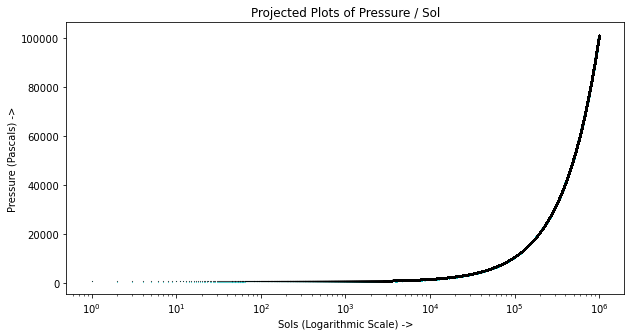

In [80]:
figure, axis = plt.subplots(1, 1, figsize=(10,5))

axis.set_title('Projected Plots of Pressure / Sol')
axis.plot(repeated_df.Sol, repeated_df['transformed_pressure'], 'c^', \
          repeated_df.Sol, repeated_df['transformer_pressure'], 'ks', \
          markersize = 0.2)

axis.set_xlabel('Sols (Logarithmic Scale) ->')
axis.set_ylabel('Pressure (Pascals) ->')
axis.set_xscale('log')

In [81]:
repeated_df = repeated_df.reset_index()

In [83]:
repeated_df.head().to_csv('Atmosphere_Snapshot.csv', index=False)

In [26]:
repeated_df.to_csv('/Users/akash/Desktop/Terraforming Mars Project/Terraforming Requirements.csv',index=False)